In [1]:
%pylab --no-import-all
%matplotlib inline
from sacla import *
import idi.util as util

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.ndimage as snd

In [3]:
runnumber=782399

In [4]:
import shutil
import os
if not os.path.exists(f'/work/gorkhover/zimmf/scratch/{runnumber}.h5'):
    print('copying file to scratch')
    shutil.copyfile(f'/UserData/gorkhover/TAIS2019/{runnumber}.h5', f'/work/gorkhover/zimmf/scratch/{runnumber}.h5')
    print('copied')
inputfile= f'/work/gorkhover/zimmf/scratch/{runnumber}.h5'

In [5]:
run = saclarun(inputfile, settings=Tais2019)
print(f'{len(run)} images in input')
print('init done', flush=True)

5000 images in input
init done


In [6]:
detectorname='detector_2d_3' #3
energy =  6400
# energy =  9200
z = (4 * 1e-2) / (50 * 1e-6)

In [7]:
mindist = np.percentile(util.diffdist(run.sampleX), 75) * 0.7
dist_ok = np.concatenate(([False],util.diffdist(run.sampleX) > mindist))
run=run[dist_ok]
detector=getattr(run,detectorname)
print(f'{len(run)} images with distok')

3824 images with distok


In [8]:
photonsum=[]
for n,img in enumerate(detector): 
    photons=util.photons_simple(img,energy,detector.absolute_gain * 3.65)
    photonsum.append(np.sum(photons))
    if n%100==0: print(n,end=' ')
photoncount_ok=np.logical_and(photonsum>np.percentile(photonsum,10),photonsum<np.percentile(photonsum,90))
run=run[photoncount_ok]
detector=getattr(run,detectorname)

print(f'\n photonnumber thresholding done, {len(run)} images remaining')

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 
 photonnumber thresholding done, 3058 images remaining


In [9]:
meanphotons=0
for n,img in enumerate(detector): 
    meanphotons+=util.photons_simple(img,energy,detector.absolute_gain * 3.65)
    if n%100==0: print(n,end=' ')
meanphotons/=n+1

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 

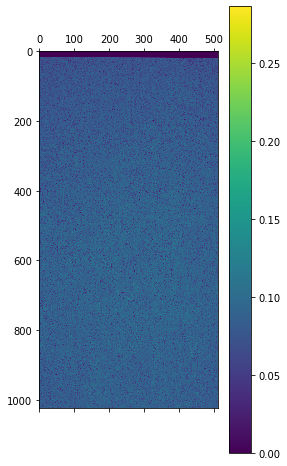

In [10]:
plt.matshow(meanphotons,vmin=0)
plt.colorbar()

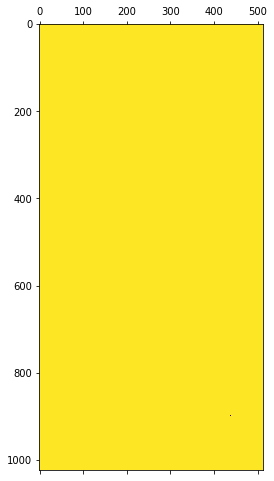

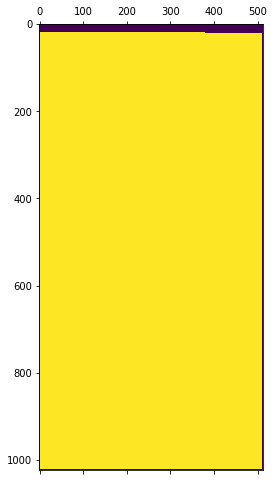

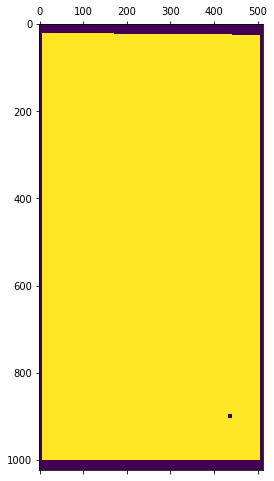

In [11]:
#create mask
mask1 = meanphotons < (np.mean(meanphotons)+5*np.std(meanphotons))
mask1=snd.morphology.binary_opening(mask1,snd.morphology.generate_binary_structure(2, 2),iterations=2)
plt.matshow(mask1)
mask2 = meanphotons > 0.05*np.mean(meanphotons[mask1])
mask2=snd.morphology.binary_closing(mask2,snd.morphology.generate_binary_structure(2, 2),iterations=2)
plt.matshow(mask2)
mask=np.logical_and(mask1,mask2)
mask[:20,:] = 0
mask[:,0] = 0
mask[-20:,:] = 0
mask[:,-1] = 0
mask =~ snd.morphology.binary_dilation(~mask,snd.morphology.generate_binary_structure(2, 2),iterations=4)
plt.matshow(mask)

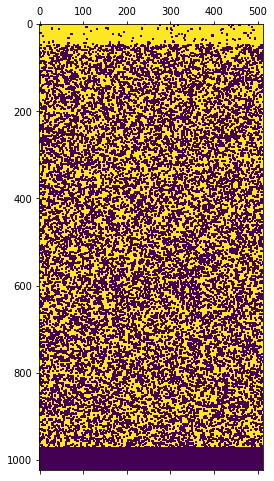

In [23]:
plt.matshow(mask)

In [ ]:
mask =~ snd.morphology.binary_dilation(~mask,snd.morphology.generate_binary_structure(2, 2),iterations=2)
plt.matshow(mask)
#ignore borders
mask[0,:] = 0
mask[:,0] = 0
mask[-1,:] = 0
mask[:,-1] = 0